# Introduction to the Indian Buffet Process
# DEMO_TOY_IMAGES

Let us first import all the necessary libraries.

In [4]:
import numpy as np # import numpy matrix for calculus with matrices
import matplotlib.pyplot as plt # import plotting library
import time        # import time to be able to measure iteration speed
import sys
import GLFM


 1. GENERATIVE MODEL

	Generating feature images (components)...
	Plotting feature images (Btrue)...


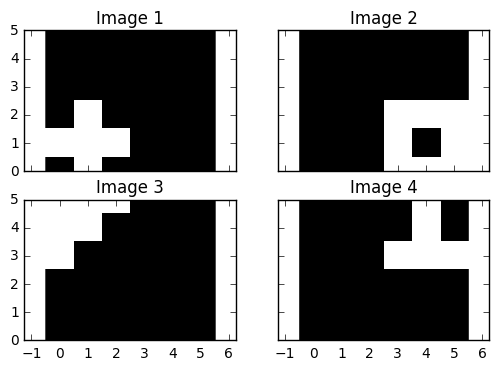

	Setting model parameters (ground truth) and generate database...
	Generating data with N=1000 and noise variance s2x=1.00


In [5]:
# ---------------------------------------------
# 1. GENERATIVE MODEL
# ---------------------------------------------
print '\n 1. GENERATIVE MODEL\n'

print '\tGenerating feature images (components)...'
# Btrue contains the features images or components in order to generate the
# whole set of images
Btrue = np.array([[0,1.0,0,0,0,0,  1,1,1,0,0,0, 0,1,0,0,0,0, \
        0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0], \
        [0,0.0,0,1,1,1,  0,0,0,1,0,1, 0,0,0,1,1,1, \
        0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0], \
        [0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0, \
        1,0,0,0,0,0, 1,1,0,0,0,0, 1,1,1,0,0,0], \
        [0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0, \
        0,0,0,1,1,1, 0,0,0,0,1,0, 0,0,0,0,1,0]])
D = Btrue.shape[1] # number of dimensions
K = Btrue.shape[0] # number of binary images

print '\tPlotting feature images (Btrue)...'
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
V = [ax1, ax2, ax3, ax4] # subfigures handlers
for i in xrange(len(Btrue)):
    pixels = Btrue[i].reshape(int(np.sqrt(Btrue.shape[1])),int(np.sqrt(Btrue.shape[1])))
    # Plot each feature component k
    V[i].imshow(pixels, cmap='gray',interpolation='nearest')
    V[i].set_ylim(0,5) # set Y-axis limits
    V[i].set_xlim(0,5) # set X-axis limits
    V[i].set_title('Image %d' % (i+1)) # set subplot title
plt.ion()  # turn on interactive mode for plotting (so that the script continues)
plt.show() # display images component

print '\tSetting model parameters (ground truth) and generate database...'
N = 1000           # number of images to be generated
s2x = 1            # noise variance for the observations

print '\tGenerating data with N=%d and noise variance s2x=%.2f' % (N,s2x)
# generate matrix Z
Ztrue = np.ascontiguousarray( np.random.randint(0,2,size=(K,N)).astype('float64') )
# Next line generates the toy database
X = np.sqrt(s2x) * np.random.randn(D,N) + np.inner(Btrue.transpose(),Ztrue.transpose())
X = np.ascontiguousarray(X) # specify way to store matrix to be compatible with C code
#X = X - 0.5 # center data



In [6]:
# ---------------------------------------------
# 2. INITIALIZATION FOR GLFM ALGORITHM
# ---------------------------------------------

print '\n 2. INITIALIZATION\n'

print '\tInitializing Z...'
Kinit = 1 # initial number of latent features
Z = np.ascontiguousarray( np.random.randint(0,2,size=(Kinit,N)).astype('float64') )

print '\tInitialization of variables needed for the GLFM model...'
C = np.tile('g',(1,X.shape[0]))[0].tostring() # vector to indicate datatype of each dimension
# Generate weights for transformation
W = np.ascontiguousarray( 2.0 / np.max(X,1) )

Niter = 1000  # number of algorithm iterations
s2y = 1      # noise variance for pseudo-obervations
s2B = 1      # noise variance for feature values




 2. INITIALIZATION

	Initializing Z...
	Initialization of variables needed for the GLFM model...


In [7]:
# ---------------------------------------------
# 3. RUN INFERENCE FOR GLFM ALGORITHM
# ---------------------------------------------
print '\tInfering latent features...'
#tic = time.time()
(Z_out,B_out,Theta_out) = GLFM.infer(X,C,Z,W,Nsim=Niter,s2Y=s2y, s2B=s2B,
        s2u=0.005, maxK=10)
#toc = time.time()
#time = tic - toc
#print '\tElapsed: %.2f seconds.' % (toc-tic)



	Infering latent features...

Entering C function...
Back to Python OK
B_out[D,Kest,maxR] where D=36, Kest=4, maxR=1


	Print inferred latent features...


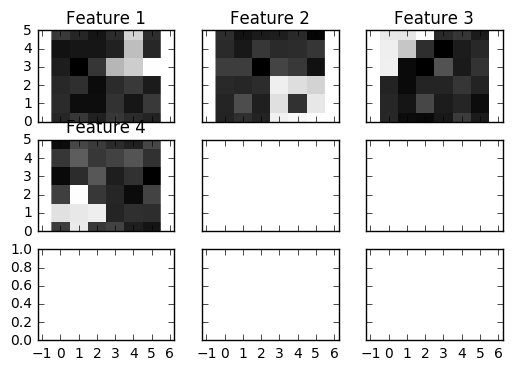



# -------------------
# END
# -------------------


In [8]:
# ---------------------------------------------
# 4. PROCESS RESULTS
# ---------------------------------------------
Kest = B_out.shape[1] # number of inferred latent features
D = B_out.shape[0]    # number of dimensions

print '\tPrint inferred latent features...'
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = \
        plt.subplots(3, 3, sharex='col', sharey='row')
V = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for k in xrange(B_out.shape[1]):
    if k>len(V):
        break;
    # visualize each inferred dimension
    B_out[:,k]
    pixels = B_out[:,k].reshape((int(np.sqrt(D)),int(np.sqrt(D))))
    pixels
    # Plot
    V[k].imshow(pixels, cmap='gray',interpolation='none')
    V[k].set_ylim(0,5)
    V[k].set_xlim(0,5)
    V[k].set_title('Feature %d' % (k+1))
plt.ion()  # interactive mode for plotting (script continues)
plt.show() # display figure

print('\n\n# -------------------')
print "# END"
print('# -------------------')
